<a href="https://colab.research.google.com/github/platypus2000jp/Colaboratory/blob/main/%E4%BE%8B%E9%A1%8C_%E9%87%8E%E9%B3%A5%E3%81%AE%E6%A8%99%E8%AD%98%E8%AA%BF%E6%9F%BB%E3%81%AE%E3%83%99%E3%82%A4%E3%82%BA%E3%83%A2%E3%83%87%E3%83%AB_PyMC3%E3%82%92%E4%BD%BF%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

野鳥の標識調査について機械学習またはベイズのモデルの解析例を示してください。Pythonでお願いします。PyMC3を使ってください。
ChatGPT:
ChatGPT
野鳥の標識調査（鳥の個体に標識をつけて再捕獲や観察する調査）データを使ったベイズ解析の例をPyMC3で示します。このような調査では「マルコフ再捕獲モデル」を使用して、再捕獲率や生存率を推定することが一般的です。

以下に、ある標識調査に基づく再捕獲モデルを実装する例を示します。このモデルでは、複数の観察期間にわたって標識された鳥が再捕獲されたかどうかの情報から生存率や再捕獲率を推定します。

python
コードをコピーする
import numpy as np
import pymc3 as pm
import arviz as az

# データの設定
# 観測期間ごとの再捕獲データ（0: 観測されなかった, 1: 観測された）
# 例として、各期間で観察された鳥のデータを二次元配列で示します
observed_data = np.array([
    [1, 0, 1, 0, 1],  # 鳥1の観測結果
    [1, 1, 0, 1, 0],  # 鳥2の観測結果
    [1, 0, 0, 0, 1],  # 鳥3の観測結果
    [1, 1, 1, 0, 0],  # 鳥4の観測結果
])

# 鳥の数と観測期間の数
n_birds, n_periods = observed_data.shape

# モデルの構築
with pm.Model() as model:
    # 生存率の事前分布（0から1の一様分布）
    survival_prob = pm.Beta('survival_prob', alpha=1, beta=1)
    
    # 再捕獲率の事前分布（0から1の一様分布）
    recapture_prob = pm.Beta('recapture_prob', alpha=1, beta=1)
    
    # 各期間の再捕獲結果を観測データとして設定
    # 各鳥と各期間での生存と再捕獲を考慮
    for bird in range(n_birds):
        alive = 1  # 最初の期間はすべての鳥が観測されていると仮定
        for period in range(1, n_periods):
            # 鳥が生存している確率に基づく生存状態
            alive = pm.Bernoulli(f"alive_{bird}_{period}", p=survival_prob, observed=alive)
            
            # 生存している場合のみ再捕獲が発生する
            pm.Bernoulli(f"recapture_{bird}_{period}", p=recapture_prob * alive, observed=observed_data[bird, period])

    # モデルのサンプリング
    trace = pm.sample(1000, chains=2)

# 結果の表示
az.plot_trace(trace)
az.summary(trace, hdi_prob=0.95)
説明
生存率と再捕獲率の定義:
survival_probとrecapture_probはそれぞれ、生存率と再捕獲率を表す確率変数として定義されています。
鳥の生存と再捕獲の確率モデリング:
各鳥に対して、各期間で生存しているかどうかをalive変数で表し、次の期間に生存率に基づいて生存が決定されます。
生存している鳥に対してのみ再捕獲が発生するようにし、再捕獲が観測される確率をrecapture_prob * aliveで定義しています。
サンプリングと結果の解析:
MCMCサンプリングを実行して、生存率と再捕獲率の事後分布を推定し、arvizを使って結果を可視化します。
このモデルを実行することで、生存率や再捕獲率に対する推定値を得られ、標識調査データからの解析が可能です。

In [3]:
import numpy as np
#import pymc3 as pm
import pymc as pm
import arviz as az

In [4]:
# データの設定
# 観測期間ごとの再捕獲データ（0: 観測されなかった, 1: 観測された）
# 例として、各期間で観察された鳥のデータを二次元配列で示します
observed_data = np.array([
    [1, 0, 1, 0, 1],  # 鳥1の観測結果
    [1, 1, 0, 1, 0],  # 鳥2の観測結果
    [1, 0, 0, 0, 1],  # 鳥3の観測結果
    [1, 1, 1, 0, 0],  # 鳥4の観測結果
])

In [5]:
# 鳥の数と観測期間の数
n_birds, n_periods = observed_data.shape

In [6]:
# モデルの構築
with pm.Model() as model:
    # 生存率の事前分布（0から1の一様分布）
    survival_prob = pm.Beta('survival_prob', alpha=1, beta=1)

    # 再捕獲率の事前分布（0から1の一様分布）
    recapture_prob = pm.Beta('recapture_prob', alpha=1, beta=1)

    # 各期間の再捕獲結果を観測データとして設定
    # 各鳥と各期間での生存と再捕獲を考慮
    for bird in range(n_birds):
        alive = 1  # 最初の期間はすべての鳥が観測されていると仮定
        for period in range(1, n_periods):
            # 鳥が生存している確率に基づく生存状態
            alive = pm.Bernoulli(f"alive_{bird}_{period}", p=survival_prob, observed=alive)

            # 生存している場合のみ再捕獲が発生する
            pm.Bernoulli(f"recapture_{bird}_{period}", p=recapture_prob * alive, observed=observed_data[bird, period])

    # モデルのサンプリング
    trace = pm.sample(1000, chains=2)

Output()

Output()

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
recapture_prob,0.444,0.115,0.239,0.681,0.003,0.002,1310.0,959.0,1.0
survival_prob,0.945,0.050,0.841,1.000,0.001,0.001,1395.0,1005.0,1.0


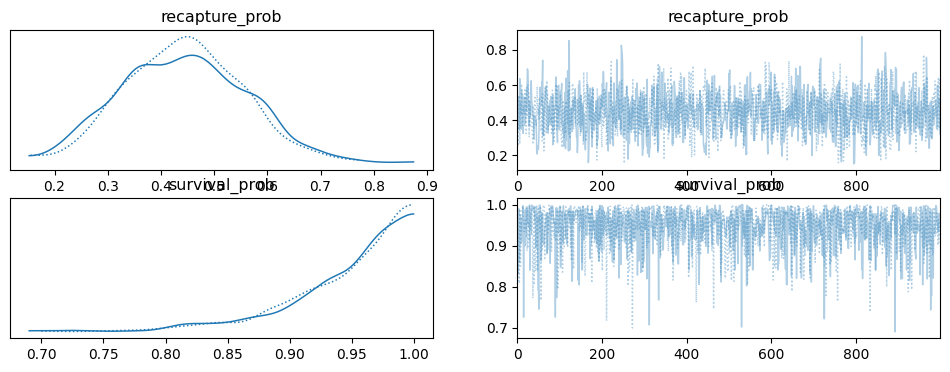

In [7]:
# 結果の表示
az.plot_trace(trace)
az.summary(trace, hdi_prob=0.95)